In [9]:
import scipy.stats as stats
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('train.csv')

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
np.random.seed(10)

In [13]:
sample_size=1000
sample = np.random.choice(a=df['SalePrice'], size= sample_size)
sample_mean = sample.mean()
sample_mean

182470.241

In [15]:
z_critical = stats.norm.ppf(q=0.95)
z_critical

1.6448536269514722

In [16]:
pop_std = df['SalePrice'].std()

In [17]:
pop_std

79442.50288288662

In [18]:
margin_of_error = z_critical * (pop_std/math.sqrt(sample_size))
margin_of_error

4132.18898033328

In [19]:
confidence_interval = (sample_mean - margin_of_error, sample_mean+margin_of_error)
confidence_interval

(178338.05201966673, 186602.42998033328)

In [20]:
np.random.seed(11)

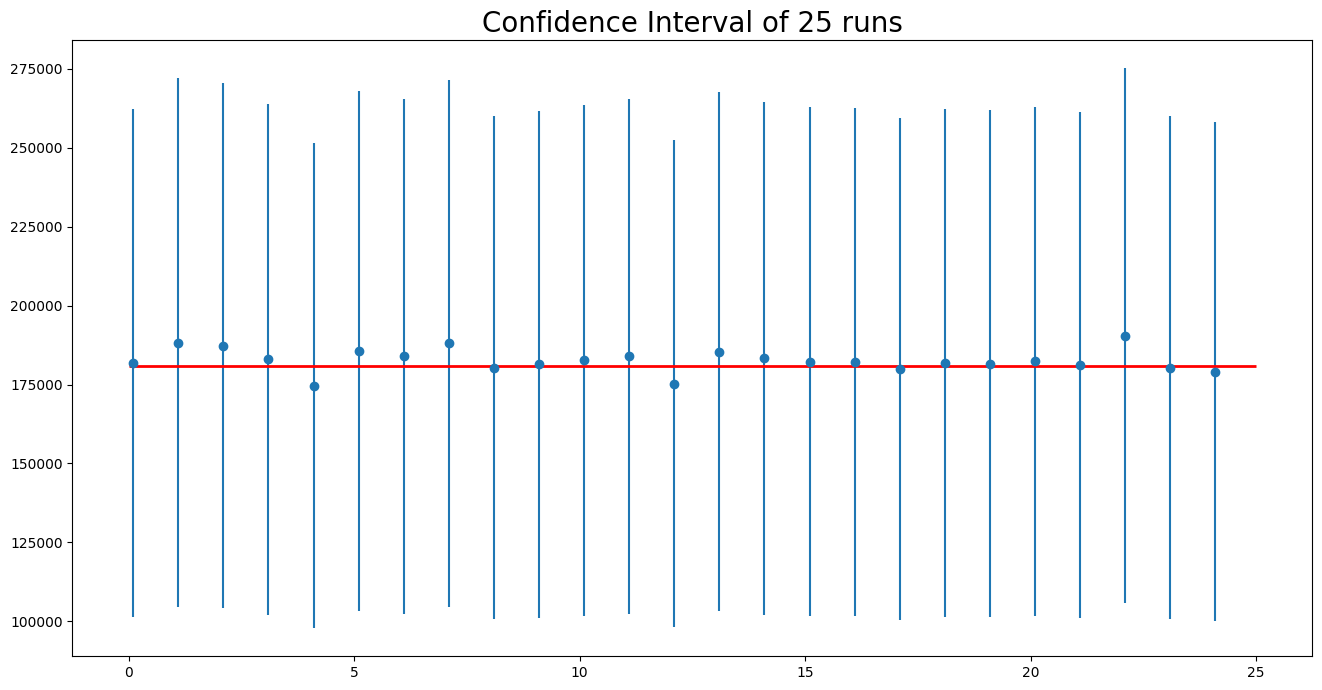

In [25]:
sample_size = 500
interval = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a=df['SalePrice'], size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
    z_critical = stats.norm.ppf(q=0.975)
    pop_std = df['SalePrice'].std()
    stats.norm.ppf(q=0.025)
    margin_of_error = z_critical * (pop_std/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error, sample_mean+margin_of_error)
    interval.append(confidence_interval)
plt.figure(figsize=(16,8))
plt.errorbar(x=np.arange(0.1, 25, 1),
            y=sample_means,
            yerr = [(top-bot/2) for top, bot in interval],
            fmt='o')
plt.hlines(xmin=0, xmax=25, y=df['SalePrice'].mean(), linewidth=2.0, color='red')
plt.title('Confidence Interval of 25 runs', fontsize=20)
plt.show()